# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [4]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import os

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2023-05-29 12:02:52--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.152
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  47.7MB/s    in 25s     

2023-05-29 12:03:20 (43.0 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [4]:
# inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
# print("input spec (in this case, just an S3 path): {}".format(inputs))

# os.environ["DEFAULT_S3_BUCKET"] = bucket
# !aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/dogImages/

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "dogImages"

role = sagemaker.get_execution_role()


In [ ]:
input_data = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)

In [7]:
print("input spec (in this case, just an S3 path): {}".format(input_data))


input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-712717073180/dogImages


In [ ]:
# os.environ["DEFAULT_S3_BUCKET"] = bucket
# !aws s3 sync ./train s3://${DEFAULT_S3_BUCKET}/train/
# !aws s3 sync ./valid s3://${DEFAULT_S3_BUCKET}/valid/
# !aws s3 sync ./test s3://${DEFAULT_S3_BUCKET}/test/


In [6]:
os.environ['SM_CHANNEL_TRAINING']='s3://sagemaker-us-east-1-559078071586/dogImages/'
os.environ['SM_MODEL_DIR']='s3://sagemaker-us-east-1-559078071586/model'
os.environ['SM_OUTPUT_DATA_DIR']='s3://sagemaker-us-east-1-559078071586/output'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [13]:
conda install torchvision -c pytorch

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         120 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    ffmpeg-4.2.2               |       h20bf706_0        59.6 MB
    flit-core-3.6.0            |     pyhd3eb1b0_0          42 KB
    gnutls-3.6.15              |       he1e5248_0         1.0 MB
    lame-3.100                 |       h7b6447c_0         323 KB
    libidn2-2.3.2              |       h7f8727e_0          81 KB
    libopus-1.3.1              |       h7b6447c_0         491 KB
    libtasn1-4.

In [8]:
# Imports
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
from torchvision import transforms
from sagemaker.pytorch import PyTorch
import gzip 
import numpy as np
import random
import os



In [9]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    #"lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256, 512]),
    "epochs": IntegerParameter(3, 5)
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [10]:
#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)



tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
)


In [11]:
# TODO: Fit your HP Tuner

tuner.fit({"training": "s3://sagemaker-us-east-1-712717073180/dogImages"},wait = True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


.............................................................................................................................................................................................................................................................................................................................................................................................................................!


In [12]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-05-29 13:10:09 Starting - Preparing the instances for training
2023-05-29 13:10:09 Downloading - Downloading input data
2023-05-29 13:10:09 Training - Training image download completed. Training in progress.
2023-05-29 13:10:09 Uploading - Uploading generated training model
2023-05-29 13:10:09 Completed - Resource released due to keep alive period expiry


{'_tuning_objective_metric': '"average test loss"',
 'batch_size': '"32"',
 'epochs': '5',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-05-29-12-50-31-868"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-12-50-31-868/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [13]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile
import sagemaker
from sagemaker.pytorch import PyTorch
import boto3
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys
from sagemaker.debugger import (
    Rule, 
    ProfilerRule, 
    rule_configs,
    DebuggerHookConfig, 
    ProfilerConfig, 
    FrameworkProfile,
    CollectionConfig
)
import os
import IPython


[2023-05-29 13:26:51.914 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:24787 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None


In [17]:
# TODO: Set up debugging and profiling rules and hooks
hyperparameters = {"epochs": 5, "batch_size": 32} # best model parameters

rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [18]:
profiler_config

In [19]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch
import smdebug.pytorch as smd


estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.p3.2xlarge",
    entry_point="train_model.py",
    framework_version="1.8",
    py_version="py36",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)

estimator.fit({"training": "s3://sagemaker-us-east-1-712717073180/dogImages"},wait=True)


INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2023-05-29-13-28-08-417


2023-05-29 13:28:10 Starting - Starting the training job...
2023-05-29 13:28:38 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2023-05-29 13:29:43 Downloading - Downloading input data......
2023-05-29 13:30:43 Training - Downloading the training image..................
2023-05-29 13:33:41 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-05-29 13:33:59,819 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-05-29 13:33:59,850 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-05-29 13:33:59,853 sagemaker_pytorch_container.training INFO     Invoking user training sc

In [20]:
# TODO: Plot a debugging output.
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

session = boto3.session.Session()
region = session.region_name

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

Training jobname: pytorch-training-2023-05-29-13-28-08-417
Region: us-east-1
[2023-05-29 13:41:47.134 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:24787 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/debug-output
[2023-05-29 13:41:47.475 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:24787 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2023-05-29 13:41:48.545 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:24787 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu_input_2',

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [21]:
#  I will check in the training job logs and in the debugger output for the error and then figure out how to solve the issue

In [22]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [23]:
! aws s3 ls {rule_output_path} --recursive

2023-05-29 13:41:29     435786 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-05-29 13:41:28     294397 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-05-29 13:41:22        560 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-05-29 13:41:22      20087 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-05-29 13:41:22       1973 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-05-29 13:41:22        130 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2023-05-29 13:41:22        918 pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-re

In [24]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-712717073180/pytorch-traini

In [26]:
# TODO: Display the profiler output


#get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [27]:
# kernel died so I want to continue from a completed training job

BestTrainingJobName='pytorch-training-2023-05-29-13-28-08-417'
best_estimator = sagemaker.estimator.Estimator.attach(BestTrainingJobName)
best_estimator.hyperparameters()



2023-05-29 13:41:57 Starting - Preparing the instances for training
2023-05-29 13:41:57 Downloading - Downloading input data
2023-05-29 13:41:57 Training - Training image download completed. Training in progress.
2023-05-29 13:41:57 Uploading - Uploading generated training model
2023-05-29 13:41:57 Completed - Training job completed


{'batch_size': '32',
 'epochs': '5',
 'sagemaker_container_log_level': '20',
 'sagemaker_job_name': '"pytorch-training-2023-05-29-13-28-08-417"',
 'sagemaker_program': '"train_model.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/source/sourcedir.tar.gz"'}

In [28]:
from sagemaker.pytorch import PyTorchModel

model_data = estimator.output_path + estimator.latest_training_job.job_name + "/output/model.tar.gz"
print(f"Model: {model_data}")


Model: s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/output/model.tar.gz


In [9]:
# Restarted Kernel
model_data = "s3://sagemaker-us-east-1-712717073180/pytorch-training-2023-05-29-13-28-08-417/output/model.tar.gz"

In [14]:
sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "dogImages"

role = sagemaker.get_execution_role()

In [15]:
import smdebug
import sagemaker
import boto3
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor

In [16]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [17]:
pytorch_model = PyTorchModel(
    model_data=model_data, 
    role=role, 
    entry_point='inference2.py',
    py_version="py36",
    framework_version="1.8",
    predictor_cls=ImagePredictor

)

In [18]:
# TODO: Deploy your model to an endpoint

predictor=pytorch_model.deploy(initial_instance_count=1, instance_type='ml.g4dn.2xlarge') # TODO: Add your deployment configuration like instance type and number of instances

---------!

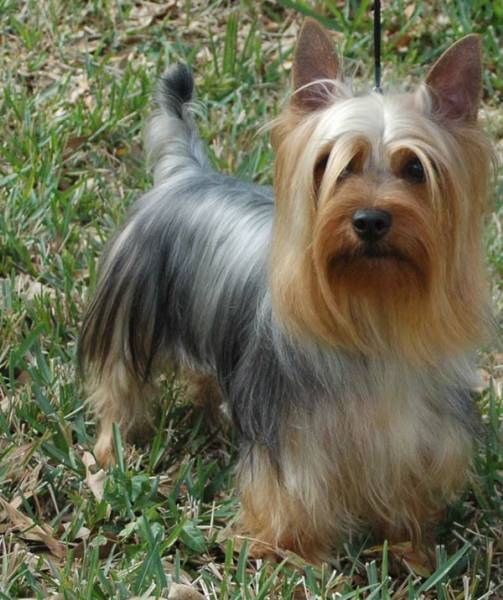

In [20]:
# Run an prediction on the endpoint
from PIL import Image
import io

with open("./dogImages/test/127.Silky_terrier/Silky_terrier_08040.jpg", "rb") as f: 
    image = f.read()
Image.open(io.BytesIO(image))

In [21]:
response = predictor.predict(image)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-05-30-01-51-06-087 in account 712717073180 for more information.

In [ ]:
np.argmax(response, 1) + 1

I searched in the logs and found nothing useful so I couldn't find the issue. I also tried for 2 days straight since I need to pass this project by tomorrow and I searched everywhere and followed every tip or suggestion I found on the internet or even on a question on the knowledge platform but with no success whatsoever. I only left the cells below to demonstrate some of my failed trials.
I tried choosing a more powerful instance type, I tried different code versions and I tried casting the image differently but nothing worked as it supposed to. What can I do to pass this and complete the nanodegree on time? :) Thanks in advance and have a good day.

In [54]:
import requests

request_dict={ "url": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/20113314/Carolina-Dog-standing-outdoors.jpg" }

img_bytes = requests.get(request_dict['url']).content
type(img_bytes)

bytes

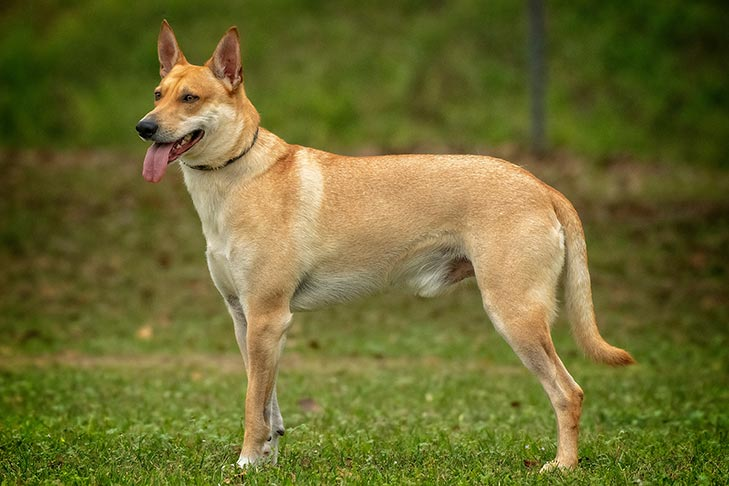

In [55]:
from PIL import Image
import io
Image.open(io.BytesIO(img_bytes))

In [56]:
response=predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-05-29-14-21-16-262 in account 712717073180 for more information.

In [57]:
import json
response2=predictor.predict(json.dumps(request_dict), initial_args={"ContentType": "application/json"})

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-05-29-14-21-16-262 in account 712717073180 for more information.

In [ ]:
import torch
import numpy as np
print(np.argmax(response, 1))
print(np.argmax(response2, 1))

In [ ]:
# import boto3

# payload = "string payload"
# endpoint_name = "pytorch-inference-2023-05-29-13-46-59-373"

# sm_runtime = boto3.client("runtime.sagemaker")
# response = sm_runtime.invoke_endpoint(
#     EndpointName=endpoint_name,
#     ContentType="text/csv",
#     Body=payload
# )
# response_str = response["Body"].read().decode()

In [58]:
# TODO: Run an prediction on the endpoint
# TODO: Your code to load and preprocess image to send to endpoint for prediction
from PIL import Image
img_path = "./dogImages/test/011.Australian_cattle_dog/Australian_cattle_dog_00734.jpg"
image = Image.open(img_path)


Below is the image that we will be testing:


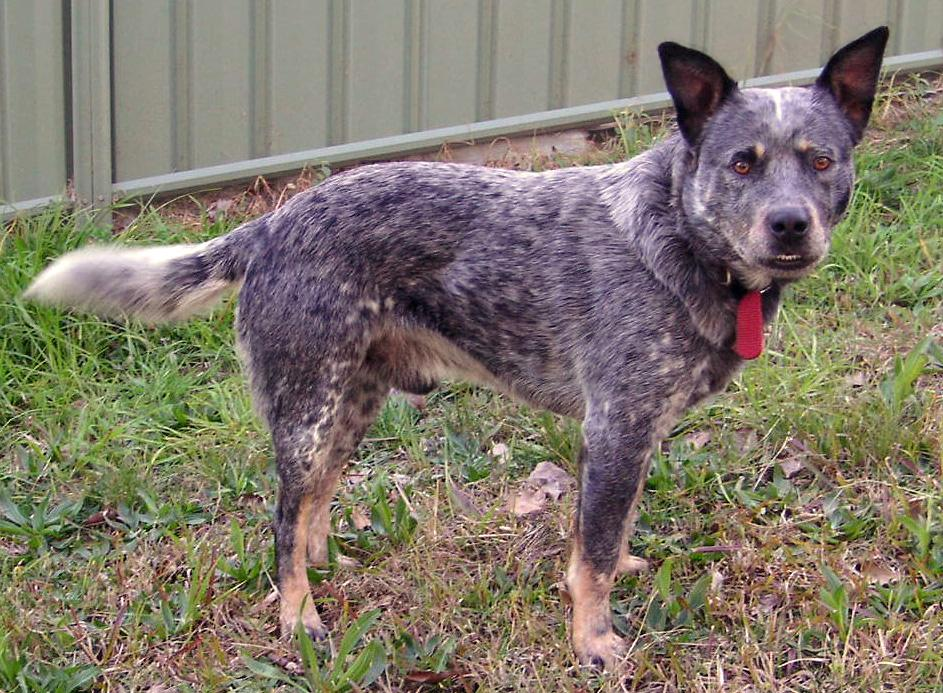

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-05-29-13-46-59-373 in account 712717073180 for more information.

In [59]:
import io
import boto3


endpoint_name = "pytorch-inference-2023-05-29-13-46-59-373"
sm_runtime = boto3.client("runtime.sagemaker")

with open(img_path , "rb") as f:
        payload = f.read()
        print("Below is the image that we will be testing:")
        display(Image.open(io.BytesIO(payload)))

response = sm_runtime.invoke_endpoint(
    EndpointName=endpoint_name,
    ContentType="image/jpeg",
    Body=payload
)
response_str = response["Body"].read().decode()


# with open(img_path , "rb") as f:
#         payload = f.read()
#         print("Below is the image that we will be testing:")
#         display(Image.open(io.BytesIO(payload)))
#         response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})
#         print(f"Response: {response}")
#         predicted_dog_breed = np.argmax(response,1) + 1 #index starts in 0 and breeds start in 1
#         print(f"Response/Inference for the above image is : {predicted_dog_breed}")

In [ ]:
response_str

In [113]:
response = predictor.predict(image,initial_args={"ContentType": "image/jpeg"}).argmax()

ParamValidationError: Parameter validation failed:
Invalid type for parameter Body, value: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x693 at 0x7F40165E2A10>, type: <class 'PIL.JpegImagePlugin.JpegImageFile'>, valid types: <class 'bytes'>, <class 'bytearray'>, file-like object

In [61]:
# load the image and return the predicted breed
predict_transforms = transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406], 
                                                       [0.229, 0.224, 0.225])])
    
predict_img = Image.open(img_path)
predict_input = predict_transforms(predict_img).unsqueeze(0)
    
prediction = int(predictor.predict(predict_input,initial_args={"ContentType": "image/jpeg"}).argmax())
prediction = int(model_transfer.forward(predict_input).argmax())
print(prediction)

ParamValidationError: Parameter validation failed:
Invalid type for parameter Body, value: tensor([[[[ 0.2111,  0.0398, -0.0287,  ...,  0.2282,  0.3823,  0.3652],
          [ 0.2111,  0.0056, -0.0629,  ...,  0.3138,  0.4337,  0.4166],
          [ 0.2111,  0.0056, -0.0458,  ...,  0.4337,  0.4679,  0.4679],
          ...,
          [ 0.6049,  1.1872,  0.8961,  ...,  0.2282,  0.2282,  0.3481],
          [ 0.0227,  0.5193,  0.3138,  ...,  0.0227,  0.1768,  0.4166],
          [ 0.9988,  0.8618,  0.7248,  ...,  0.1939,  0.1083,  0.3652]],

         [[ 0.4503,  0.2577,  0.1877,  ...,  0.1001,  0.1877,  0.2052],
          [ 0.4503,  0.2402,  0.1527,  ...,  0.1527,  0.2402,  0.2927],
          [ 0.4328,  0.2577,  0.1877,  ...,  0.2402,  0.2927,  0.3627],
          ...,
          [ 0.2577,  0.9405,  0.7304,  ...,  0.0301, -0.0224,  0.0301],
          [-0.4776,  0.0651, -0.0574,  ..., -0.1450, -0.0049,  0.1877],
          [ 0.6604,  0.5028,  0.4153,  ..., -0.0224, -0.1450,  0.1527]],

         [[ 0.5485,  0.3742,  0.3045,  ...,  0.1476,  0.2173,  0.1825],
          [ 0.5311,  0.3393,  0.2522,  ...,  0.1825,  0.2696,  0.2696],
          [ 0.4788,  0.3219,  0.2696,  ...,  0.2522,  0.3393,  0.3742],
          ...,
          [ 0.4265,  1.0714,  0.8274,  ..., -0.3230, -0.4275, -0.2532],
          [-0.2184,  0.3568,  0.2173,  ..., -0.3578, -0.2881, -0.0092],
          [ 0.7054,  0.6356,  0.6008,  ..., -0.0790, -0.2707,  0.0431]]]]), type: <class 'torch.Tensor'>, valid types: <class 'bytes'>, <class 'bytearray'>, file-like object

In [110]:
prediction = predict_breed_transfer(img_path)
print(prediction)

ParamValidationError: Parameter validation failed:
Invalid type for parameter Body, value: tensor([[[[ 0.2111,  0.0398, -0.0287,  ...,  0.2282,  0.3823,  0.3652],
          [ 0.2111,  0.0056, -0.0629,  ...,  0.3138,  0.4337,  0.4166],
          [ 0.2111,  0.0056, -0.0458,  ...,  0.4337,  0.4679,  0.4679],
          ...,
          [ 0.6049,  1.1872,  0.8961,  ...,  0.2282,  0.2282,  0.3481],
          [ 0.0227,  0.5193,  0.3138,  ...,  0.0227,  0.1768,  0.4166],
          [ 0.9988,  0.8618,  0.7248,  ...,  0.1939,  0.1083,  0.3652]],

         [[ 0.4503,  0.2577,  0.1877,  ...,  0.1001,  0.1877,  0.2052],
          [ 0.4503,  0.2402,  0.1527,  ...,  0.1527,  0.2402,  0.2927],
          [ 0.4328,  0.2577,  0.1877,  ...,  0.2402,  0.2927,  0.3627],
          ...,
          [ 0.2577,  0.9405,  0.7304,  ...,  0.0301, -0.0224,  0.0301],
          [-0.4776,  0.0651, -0.0574,  ..., -0.1450, -0.0049,  0.1877],
          [ 0.6604,  0.5028,  0.4153,  ..., -0.0224, -0.1450,  0.1527]],

         [[ 0.5485,  0.3742,  0.3045,  ...,  0.1476,  0.2173,  0.1825],
          [ 0.5311,  0.3393,  0.2522,  ...,  0.1825,  0.2696,  0.2696],
          [ 0.4788,  0.3219,  0.2696,  ...,  0.2522,  0.3393,  0.3742],
          ...,
          [ 0.4265,  1.0714,  0.8274,  ..., -0.3230, -0.4275, -0.2532],
          [-0.2184,  0.3568,  0.2173,  ..., -0.3578, -0.2881, -0.0092],
          [ 0.7054,  0.6356,  0.6008,  ..., -0.0790, -0.2707,  0.0431]]]]), type: <class 'torch.Tensor'>, valid types: <class 'bytes'>, <class 'bytearray'>, file-like object

In [65]:
transform = transforms.Compose([
            transforms.Resize((112,112)),
            transforms.ToTensor(),
        ])
preprocessed_image = transform(image).unsqueeze(0)
preprocessed_image = preprocessed_image.to("cpu")

In [86]:
# endpoint_name = "pytorch-inference-2023-05-29-02-16-04-746"
# response = runtime.invoke_endpoint(EndpointName=endpoint_name,
#                                    ContentType='image/jpeg',
#                                    Body=open('preprocessed_image.jpeg'))

In [66]:
from torch import Tensor
import pickle

pimage_pickled = pickle.dumps(preprocessed_image)

response = predictor.predict(pimage_pickled,initial_args={"ContentType": "image/jpeg"})

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (0) from primary with message "Your invocation timed out while waiting for a response from container primary. Review the latency metrics for each container in Amazon CloudWatch, resolve the issue, and try again.". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/pytorch-inference-2023-05-29-14-21-16-262 in account 712717073180 for more information.

In [105]:
response = predictor.predict(preprocessed_image,initial_args={"ContentType": "image/jpeg"})

ParamValidationError: Parameter validation failed:
Invalid type for parameter Body, value: <PIL.Image.Image image mode=RGB size=304x224 at 0x7F4016753950>, type: <class 'PIL.Image.Image'>, valid types: <class 'bytes'>, <class 'bytearray'>, file-like object

In [ ]:
pred = np.argmax(response, 1) + 1

In [22]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()